# Vacancy & Unemployment Rate Forecast

In [1]:
# load the library for path
from pathlib import Path
import pandas as pd
import openpyxl as xl
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as ax1
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import *
import matplotlib.pyplot as plt
from datetime import *

In [3]:
# import data set
#data_dir = Path('../datathon')

# read xlsx data set
df = pd.read_csv('../data/Vacancy Rate.csv', index_col = [0], parse_dates=[0])

# remove all the empty column
df = df.dropna(axis=1, how='all')
df.dropna(inplace=True)

# read data set
df_unemployment = pd.read_csv('../data/Unemployment Rate.csv')

# remove the empty columns
df_unemployment = df_unemployment.dropna(axis=1, how='all')

# change the type of df_employment as data frame
df_unemployment = pd.DataFrame(df_unemployment)

# change all the data in df_unemployment to float data except the date
df_unemployment.iloc[:,1:] = df_unemployment.iloc[:,1:].astype(float)
df_unemployment.iloc[:,0] = pd.to_datetime(df_unemployment.iloc[:,0])
df_unemployment = df_unemployment.set_index('Date')

# Function for ETS and ARIMA test

In [4]:
def ets_fore_a(data,i):
    # ets test
    ets_model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=i)
    ets_model_fit = ets_model.fit()
    ets_pred = ets_model_fit.forecast(8)
    return ets_pred
def ets_fore_b(data,i):
    # ets test
    ets_model = ExponentialSmoothing(data, trend='add', seasonal='mul', seasonal_periods=i)
    ets_model_fit = ets_model.fit()
    ets_pred = ets_model_fit.forecast(8)
    return ets_pred
def ets_fore_c(data,i):
    # ets test
    ets_model = ExponentialSmoothing(data, trend='mul', seasonal='add', seasonal_periods=i)
    ets_model_fit = ets_model.fit()
    ets_pred = ets_model_fit.forecast(8)
    return ets_pred
def ets_fore_d(data,i):
    # ets test
    ets_model = ExponentialSmoothing(data, trend='mul', seasonal='mul', seasonal_periods=i)
    ets_model_fit = ets_model.fit()
    ets_pred = ets_model_fit.forecast(8)
    return ets_pred

def ARIMA_fore(data):
    # arima test
    stepwise_model = auto_arima(data, start_p=1, start_q=1,
                                stepwise=True)
    stepwise_model.fit(data)
    arima_pred = stepwise_model.predict(n_periods=8)
    return arima_pred

def dateofforecast(data):
    forecast_date = ['2023-04-01', '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01','2025-01-01']
    forecast_date = pd.to_datetime(forecast_date)
    data.index = forecast_date

# Job Vacancy Rate Forecast

In [5]:
# ETS prediction
VETS_Kedah = ets_fore_a(df['Kedah'],6)
VETS_Melaka = ets_fore_a(df['Melaka'],6)
VETS_Negeri_Sembilan = ets_fore_c(df['Negeri Sembilan'],6)
VETS_Pahang = ets_fore_a(df['Pahang'],6)
VETS_Perlis = ets_fore_c(df['Perlis'],6)
VETS_Terengganu = ets_fore_a(df['Terengganu'],6)
VETS_Sabah = ets_fore_a(df['Sabah'],6)
VETS_Sarawak = ets_fore_a(df['Sarawak'],6)
VETS_Putrajaya = ets_fore_a(df['W.P Putrajaya'],6)

# ARIMA prediction
VETS_Johor = ARIMA_fore(df['Johor'])
VETS_Kelantan = ARIMA_fore(df['Kelantan'])
VETS_Penang = ARIMA_fore(df['Pulau Pinang'])
VETS_Perak = ARIMA_fore(df['Perak'])
VETS_Selangor = ARIMA_fore(df['Selangor'])
VETS_Kuala_Lumpur = ARIMA_fore(df['W.P Kuala Lumpur'])
VETS_Labuan = ARIMA_fore(df['W.P Labuan'])
VETS_Total = ARIMA_fore(df['Total'])

# Change the Starting date of the forecast
dateofforecast(VETS_Kedah)
dateofforecast(VETS_Melaka)
dateofforecast(VETS_Negeri_Sembilan)
dateofforecast(VETS_Pahang)
dateofforecast(VETS_Perlis)
dateofforecast(VETS_Terengganu)
dateofforecast(VETS_Sabah)
dateofforecast(VETS_Sarawak)
dateofforecast(VETS_Putrajaya)
dateofforecast(VETS_Johor)
dateofforecast(VETS_Kelantan)
dateofforecast(VETS_Penang)
dateofforecast(VETS_Perak)
dateofforecast(VETS_Selangor)
dateofforecast(VETS_Kuala_Lumpur)
dateofforecast(VETS_Labuan)
dateofforecast(VETS_Total)

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\U

# Unemployment Rate 

In [6]:
# ETS Model
Johor_vpred = ets_fore_a(df_unemployment[['Johor']],6)
Kedah_pred = ets_fore_d(df_unemployment[['Kedah']],6)
Kelantan_pred = ets_fore_d(df_unemployment[['Kelantan']],6)
Melaka_pred = ets_fore_b(df_unemployment[['Melaka']],6)
Pahang_pred = ets_fore_c(df_unemployment[['Pahang']],6)
Perak_pred = ets_fore_c(df_unemployment[['Perak']],6)
Perlis_pred = ets_fore_c(df_unemployment[['Perlis']],6)
Sabah_pred = ets_fore_a(df_unemployment[['Sabah']],6)
Sarawak_pred = ets_fore_d(df_unemployment[['Sarawak']],6)
Selangor_pred = ets_fore_d(df_unemployment[['Selangor']],6)
Terengganu_pred = ets_fore_b(df_unemployment[['Terengganu']],6)
Labuan_pred = ets_fore_d(df_unemployment['W.P Labuan'],6)

# ARIMA Model
UARIMA_N9_pred = ARIMA_fore(df_unemployment[['Negeri Sembilan']])
UARIMA_Penang_pred = ARIMA_fore(df_unemployment[['Pulau Pinang']])
UARIMA_KL_pred = ARIMA_fore(df_unemployment[['W.P Kuala Lumpur']])
UARIMA_Putrajaya_pred = ARIMA_fore(df_unemployment[['W.P Putrajaya']])
UARIMA_Malaysia_pred = ARIMA_fore(df_unemployment[['Total']])

# Change the Starting date of the forecast
dateofforecast(Johor_vpred)
dateofforecast(Kedah_pred)
dateofforecast(Kelantan_pred)
dateofforecast(Melaka_pred)
dateofforecast(Pahang_pred)
dateofforecast(Perak_pred)
dateofforecast(Perlis_pred)
dateofforecast(Sabah_pred)
dateofforecast(Sarawak_pred)
dateofforecast(Selangor_pred)
dateofforecast(Terengganu_pred)
dateofforecast(Labuan_pred)
dateofforecast(UARIMA_N9_pred)
dateofforecast(UARIMA_Penang_pred)
dateofforecast(UARIMA_KL_pred)
dateofforecast(UARIMA_Putrajaya_pred)
dateofforecast(UARIMA_Malaysia_pred)

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\U

In [7]:
df.dateformat = df.index.strftime('%Y-%m-%d')
df_unemployment.dateformat = df_unemployment.index.strftime('%Y-%d-%m')
df.head()

# check the date format pattern of df, the result is %Y-%d-%m, without change the date format
df_unemployment.dateformat
df.dateformat

C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_34920\3150609860.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dateformat = df.index.strftime('%Y-%m-%d')
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_34920\3150609860.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_unemployment.dateformat = df_unemployment.index.strftime('%Y-%d-%m')


Index(['2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01', '2020-07-01',
       '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
       '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01'],
      dtype='object', name='Date')

In [8]:
def forecast_plot(state):
    state = state.title()
    if state == 'Kedah':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Kedah'], label='Vacancy Rate')
        ax1.plot(VETS_Kedah, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Kedah'], 'r', label='Unemployment Rate')
        ax2.plot(Kedah_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Johor':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Johor'], label='Vacancy Rate')
        ax1.plot(VETS_Johor, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Johor'], 'r', label='Unemployment Rate')
        ax2.plot(Johor_vpred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')

        plt.show()

    elif state == 'Kelantan':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Kelantan'], label='Vacancy Rate')
        ax1.plot(VETS_Kelantan, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Kelantan'], 'r', label='Unemployment Rate')
        ax2.plot(Kelantan_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')

        plt.show()
    elif state == 'Melaka':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Melaka'], label='Vacancy Rate')
        ax1.plot(VETS_Melaka, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Melaka'], 'r', label='Unemployment Rate')
        ax2.plot(Melaka_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Negeri Sembilan':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Negeri Sembilan'], label='Vacancy Rate')
        ax1.plot(VETS_Negeri_Sembilan, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Negeri Sembilan'], 'r', label='Unemployment Rate')
        ax2.plot(UARIMA_N9_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Pahang':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Pahang'], label='Vacancy Rate')
        ax1.plot(VETS_Pahang, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Pahang'], 'r', label='Unemployment Rate')
        ax2.plot(Pahang_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Penang':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Pulau Pinang'], label='Vacancy Rate')
        ax1.plot(VETS_Penang, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Pulau Pinang'], 'r', label='Unemployment Rate')
        ax2.plot(UARIMA_Penang_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Perak':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Perak'], label='Vacancy Rate')
        ax1.plot(VETS_Perak, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(df_unemployment.index, df_unemployment['Perak'], 'r', label='Unemployment Rate')
        ax2.plot(Perak_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Perlis':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Perlis'], label='Vacancy Rate')
        ax1.plot(VETS_Perlis, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(Perlis_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['Perlis'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Sabah':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Sabah'], label='Vacancy Rate')
        ax1.plot(VETS_Sabah, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(Sabah_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['Sabah'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Sarawak':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Sarawak'], label='Vacancy Rate')
        ax1.plot(VETS_Sarawak, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(Sarawak_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['Sarawak'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Selangor':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Selangor'], label='Vacancy Rate')
        ax1.plot(VETS_Selangor, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(Selangor_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['Selangor'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Terengganu':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['Terengganu'], label='Vacancy Rate')
        ax1.plot(VETS_Terengganu, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(Terengganu_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['Terengganu'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Kuala Lumpur':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['W.P Kuala Lumpur'], label='Vacancy Rate')
        ax1.plot(VETS_Kuala_Lumpur, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(UARIMA_KL_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['W.P Kuala Lumpur'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Labuan':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['W.P Labuan'], label='Vacancy Rate')
        ax1.plot(VETS_Labuan, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(Labuan_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['W.P Labuan'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Putrajaya':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))

        ax1.plot(df.index, df['W.P Putrajaya'], label='Vacancy Rate')
        ax1.plot(VETS_Putrajaya, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        
        ax2 = ax1.twinx()
        ax2.plot(UARIMA_Putrajaya_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['W.P Putrajaya'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        plt.show()
    elif state == 'Malaysia':
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(20, 12))

        ax1.plot(df.index, df['Total'], label='Vacancy Rate')
        ax1.plot(VETS_Total, label='Forecast of Vacancy Rate')
        ax1.legend(loc='upper left')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Vacancy Rate')
        
        ax2 = ax1.twinx()
        ax2.plot(UARIMA_Malaysia_pred, 'b', label='Forecast of Unemployment Rate')
        ax2.plot(df_unemployment.index, df_unemployment['Total'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper left', bbox_to_anchor=(0, .95))
        ax2.set_ylabel('Unemployment Rate')
        plt.show()

In [9]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 12)

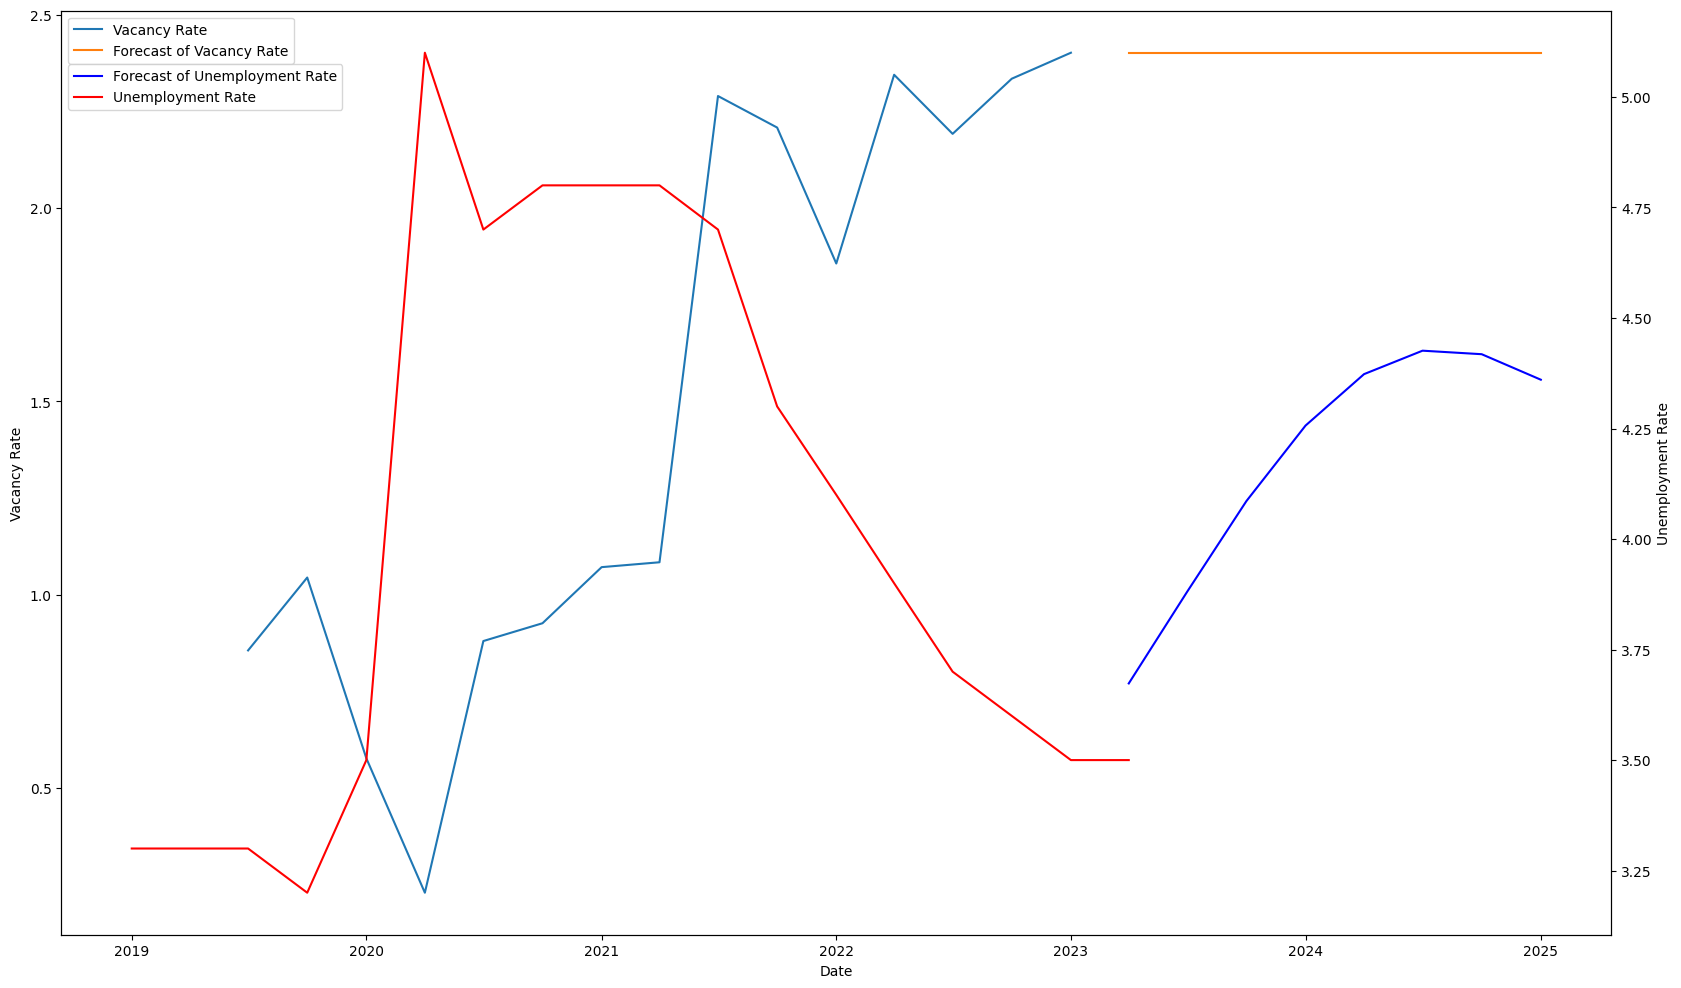

<Figure size 2000x1200 with 0 Axes>

In [10]:
forecast_plot("Malaysia")